**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv(r'C:\Users\Shridhar\Desktop\cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [7]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [ ]:
hyperparams_grid = {'max_depth':[3, 6, 9, 12],'n_estimators':[10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(rf,param_grid=hyperparams_grid,verbose=2,)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [ ]:
grid_search.fit(X_train,y_train)

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [ ]:
gds_results=pd.DataFrame(grid_search.cv_results_)

**Find the best hyperparameters from the cross-validation.**

In [ ]:
grid_search.best_params_

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [15]:
# Create a 5x5 grid
x,y = np.meshgrid(range(5), range(5))

In [16]:
# Set color map to `plt.cm.jet`
color_map= plt.cm.jet

Text(0, 0.5, 'Maximum depth')

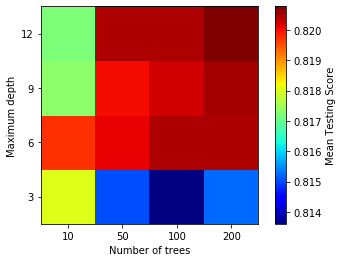

In [17]:
# Visualize pcolormesh
ax = plt.axes()
graph = ax.pcolormesh(x, y, gds_results['mean_test_score'].values.reshape((4,4)), cmap=color_map)
plt.colorbar(graph, label='Mean Testing Score')
ax.set_aspect('equal')
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_yticks([0.5, 1.5, 2.5, 3.5])
ax.set_xticklabels([str(tick_label) for tick_label in hyperparams_grid['n_estimators']])
ax.set_yticklabels([str(tick_label) for tick_label in hyperparams_grid['max_depth']])
ax.set_xlabel('Number of trees')
ax.set_ylabel('Maximum depth')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [19]:
# Create a dataframe of the feature names and importance
gds_features_importance=pd.DataFrame({'Features':features_response[:-1],'Importance':grid_search.best_estimator_.feature_importances_})
gds_features_importance

,Features,Importance
0,LIMIT_BAL,0.059877
1,EDUCATION,0.012451
2,MARRIAGE,0.007819
3,AGE,0.042871
4,PAY_1,0.304592
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
7,BILL_AMT3,0.048639
8,BILL_AMT4,0.046171
9,BILL_AMT5,0.043062


In [20]:
# Sort values by importance
gds_features_importance.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.304592
11,PAY_AMT1,0.060596
0,LIMIT_BAL,0.059877
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
12,PAY_AMT2,0.051697
7,BILL_AMT3,0.048639
13,PAY_AMT3,0.048254
8,BILL_AMT4,0.046171
10,BILL_AMT6,0.045718
